In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline    
#!pip install Folium
#import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

def __iter__(self): return 0




In [2]:
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ec163e77affc46fa99f98234ef367f9b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fAoov85MUzPeW32wmnh7O3aCEBEs-W7G4SqaeZS9Go-3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_ec163e77affc46fa99f98234ef367f9b.get_object(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='311_Service_Requests_from_2010_to_Present_min.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [3]:

body = client_ec163e77affc46fa99f98234ef367f9b.get_object(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


In [4]:

body = client_ec163e77affc46fa99f98234ef367f9b.get_object(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [5]:

body = client_ec163e77affc46fa99f98234ef367f9b.get_object(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='MN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_Flag,PFIRM15_Flag,Version
0,MN,1,10,101,5.0,1011.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,1.0,1.0,18V1
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1


In [6]:

body = client_ec163e77affc46fa99f98234ef367f9b.get_object(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='QN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,QN,6,1,402,1.0,NaN,30.0,26.0,11101.0,L115,...,Y,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
1,QN,6,3,402,1.0,1015.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
2,QN,6,8,402,1.0,1011.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,08/07/2013,1,1.0,1.0,18V1
3,QN,6,20,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
4,QN,6,30,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/08/2017,1,1.0,1.0,18V1


In [7]:

body = client_ec163e77affc46fa99f98234ef367f9b.get_object(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='SI_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_6 = pd.read_csv(body)
df_data_6.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,SI,1,10,501,3.0,2000.0,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
1,SI,1,17,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
2,SI,1,18,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
3,SI,1,19,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
4,SI,1,21,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1


In [8]:
client_cred = ibm_boto3.client(service_name='s3',
ibm_api_key_id='fAoov85MUzPeW32wmnh7O3aCEBEs-W7G4SqaeZS9Go-3',
ibm_auth_endpoint='https://iam.cloud.ibm.com/oidc/token',
config=Config(signature_version='oauth'),
endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

In [9]:
df_data_1.to_pickle('./df_raw_311.pkl')

In [10]:
client_cred.upload_file('./df_raw_311.pkl','edx1-donotdelete-pr-mimwnjmslwrxhv','df_raw_cos_311.pkl')

In [11]:
client_cred.download_file(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='df_raw_cos_311.pkl',Filename='./df_raw_local_311.pkl')

In [12]:
df_raw_local_311 = pd.read_pickle('./df_raw_local_311.pkl')
#df_raw_local.head()
df_raw_local_311.shape

(6019843, 16)

In [13]:
df_raw_local_311.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [14]:
df_data_2.to_pickle('./df_raw_bk.pkl')

In [15]:
client_cred.upload_file('./df_raw_bk.pkl','edx1-donotdelete-pr-mimwnjmslwrxhv','df_raw_cos_bk.pkl')

In [16]:
client_cred.download_file(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='df_raw_cos_bk.pkl',Filename='./df_raw_local_bk.pkl')

In [17]:
df_raw_local_bk = pd.read_pickle('./df_raw_local_bk.pkl')
#df_raw_local.head()
df_raw_local_bk.shape

(277316, 87)

In [18]:
df_raw_local_bk.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [19]:
df_data_3.to_pickle('./df_raw_bx.pkl')

In [20]:
client_cred.upload_file('./df_raw_bx.pkl','edx1-donotdelete-pr-mimwnjmslwrxhv','df_raw_cos_bx.pkl')

In [21]:
client_cred.download_file(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='df_raw_cos_bx.pkl',Filename='./df_raw_local_bx.pkl')

In [22]:
df_raw_local_bx = pd.read_pickle('./df_raw_local_bx.pkl')
#df_raw_local.head()
df_raw_local_bx.shape

(89854, 87)

In [23]:
df_raw_local_bx.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [24]:
df_data_4.to_pickle('./df_raw_mn.pkl')

In [25]:
client_cred.upload_file('./df_raw_mn.pkl','edx1-donotdelete-pr-mimwnjmslwrxhv','df_raw_cos_mn.pkl')

In [26]:
client_cred.download_file(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='df_raw_cos_mn.pkl',Filename='./df_raw_local_mn.pkl')

In [27]:
df_raw_local_mn = pd.read_pickle('./df_raw_local_mn.pkl')
#df_raw_local.head()
df_raw_local_mn.shape

(42966, 87)

In [28]:
df_raw_local_mn.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [29]:
df_data_5.to_pickle('./df_raw_qn.pkl')

In [30]:
client_cred.upload_file('./df_raw_qn.pkl','edx1-donotdelete-pr-mimwnjmslwrxhv','df_raw_cos_qn.pkl')

In [31]:
client_cred.download_file(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='df_raw_cos_qn.pkl',Filename='./df_raw_local_qn.pkl')

In [32]:
df_raw_local_qn = pd.read_pickle('./df_raw_local_qn.pkl')
#df_raw_local.head()
df_raw_local_qn.shape

(324583, 87)

In [33]:
df_raw_local_qn.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [34]:
df_data_6.to_pickle('./df_raw_si.pkl')

In [35]:
client_cred.upload_file('./df_raw_si.pkl','edx1-donotdelete-pr-mimwnjmslwrxhv','df_raw_cos_si.pkl')

In [36]:
client_cred.download_file(Bucket='edx1-donotdelete-pr-mimwnjmslwrxhv',Key='df_raw_cos_si.pkl',Filename='./df_raw_local_si.pkl')

In [37]:
df_raw_local_si = pd.read_pickle('./df_raw_local_si.pkl')
#df_raw_local.head()
df_raw_local_si.shape

(124493, 87)

In [38]:
df_raw_local_si.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [39]:
df_raw_local_bk.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCenterDistrict',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tra

In [40]:
df_raw_local_bk.shape

(277316, 87)

In [41]:
df_data_BK_1 = df_raw_local_bk[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea','YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

In [42]:
df_data_BK_1.shape

(277316, 20)

In [43]:
df_data_BK_1 = df_data_BK_1.dropna()

In [44]:
df_data_BK_1.shape

(273931, 20)

In [45]:
df_data_BK_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
1,10 JAY STREET,163894,195.0,8.33,2.0,6.5,50,19682,207.25,1,10.0,147505,0,5.4,16389,1920,1994,11201.0,195989.0,987838.0
2,1 JOHN STREET,102534,0.0,0.00,2.0,0.0,7501,0,0.00,1,12.0,0,97848,0.0,4686,0,0,11201.0,195992.0,987624.0
3,JAY STREET,0,0.0,0.00,2.0,0.0,1,387060,469.00,15,0.0,0,0,0.0,0,0,0,11201.0,196151.0,988568.0
6,135 MARSHALL STREET,0,0.0,0.00,2.0,0.0,1,0,346.00,4,0.0,0,0,0.0,0,0,0,11201.0,196266.0,989346.0
8,1 HUDSON AVENUE,0,0.0,0.00,2.0,0.0,1,323307,657.00,15,0.0,0,0,0.0,0,0,0,11201.0,196040.0,989745.0


In [46]:
df_raw_local_bx.shape

(89854, 87)

In [47]:
df_data_BX_1 = df_raw_local_bx[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea','YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

In [48]:
df_data_BX_1.shape

(89854, 20)

In [49]:
df_data_BX_1 = df_data_BX_1.dropna()

In [50]:
df_data_BX_1.shape

(86591, 20)

In [51]:
df_data_BX_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [52]:
df_raw_local_mn.shape

(42966, 87)

In [53]:
df_data_MN_1 = df_raw_local_mn[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea','YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]


In [54]:
df_data_MN_1.shape

(42966, 20)

In [55]:
df_data_MN_1 = df_data_MN_1.dropna()

In [56]:
df_data_MN_1.shape

(42216, 20)

In [57]:
df_data_MN_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,1 GOVERNORS ISLAND,2725731,0.0,0.35,0.0,1.0,10,7736692,0.00,159,0.0,0,0,0.6,0,1900,0,10004.0,190225.0,979071.0
1,1 LIBERTY ISLAND,541886,0.0,1.00,0.0,1.0,101,541886,1046.00,11,0.0,0,0,0.6,0,1900,0,10004.0,190636.0,971677.0
2,1 ELLIS ISLAND,603130,0.0,0.22,0.0,1.0,201,2764190,0.00,13,0.0,0,0,0.6,0,1900,0,10004.0,193648.0,972790.0
5,4 SOUTH STREET,280000,210.0,1.34,2.0,6.5,1,209215,564.84,2,5.0,0,0,0.0,0,1908,2006,10004.0,194440.0,980670.0
6,10 SOUTH STREET,158197,270.0,0.83,3.4,10.0,2,191502,555.84,1,5.0,0,0,10.0,0,1900,2001,10004.0,194506.0,981037.0


In [58]:
df_raw_local_qn.shape

(324583, 87)

In [59]:
df_data_QN_1 = df_raw_local_qn[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea','YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]


In [60]:
df_data_QN_1.shape

(324583, 20)

In [61]:
df_data_QN_1 = df_data_QN_1.dropna()

In [62]:
df_data_QN_1.shape

(316134, 20)

In [63]:
df_data_QN_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
1,2 STREET,0,0.0,0.00,0.0,10.0,3,21139,110.00,1,0.0,0,0,10.0,0,0,0,11101.0,209421.0,995513.0
2,1-50 51 AVENUE,136108,249.0,4.07,0.0,10.0,8,33454,184.48,1,5.0,0,0,10.0,0,2011,2011,11101.0,209867.0,995477.0
8,2 STREET,0,0.0,0.00,0.0,10.0,50,64242,336.76,0,0.0,0,0,10.0,0,0,0,11101.0,209090.0,995300.0
9,2 STREET,0,0.0,0.00,0.0,10.0,60,110906,340.92,0,0.0,0,0,10.0,0,0,0,11101.0,209442.0,995395.0
12,1-55 BORDEN AVENUE,228309,70.0,18.87,0.0,10.0,7501,12100,110.00,2,32.0,0,225416,10.0,2893,2013,0,11101.0,209799.0,995600.0


In [64]:
df_raw_local_si.shape

(124493, 87)

In [65]:
df_data_SI_1 = df_raw_local_si[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea','YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]


In [66]:
df_data_SI_1.shape

(124493, 20)

In [67]:
df_data_SI_1 = df_data_SI_1.dropna()

In [68]:
df_data_SI_1.shape

(116370, 20)

In [69]:
df_data_SI_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,139 BAY STREET,18965,50.0,3.32,3.4,4.8,10,5716,84.0,1,4.0,0,0,2.43,6965,1884,2000,10301.0,171951.0,963297.0
6,65 BAY STREET,10600,41.0,2.30,3.4,4.8,51,4600,70.0,1,3.0,9400,0,2.43,0,1923,1991,10301.0,172669.0,963320.0
7,45 BAY STREET,34800,100.0,2.45,3.4,4.8,55,14200,234.0,1,2.0,34800,0,2.43,0,1932,0,10301.0,172845.0,963387.0
8,5 BAY STREET,34941,41.0,0.10,3.4,4.8,60,334565,234.0,4,4.0,0,0,2.43,0,1931,0,10301.0,172927.0,963621.0
9,150 THE PROMENADE,2700,61.0,0.02,3.4,4.8,65,121810,0.0,2,3.0,0,0,2.43,0,1931,0,10301.0,172762.0,963871.0


In [70]:
df_data_SI_1.dtypes

Address        object
BldgArea        int64
BldgDepth     float64
BuiltFAR      float64
CommFAR       float64
FacilFAR      float64
Lot             int64
LotArea         int64
LotDepth      float64
NumBldgs        int64
NumFloors     float64
OfficeArea      int64
ResArea         int64
ResidFAR      float64
RetailArea      int64
YearBuilt       int64
YearAlter1      int64
ZipCode       float64
YCoord        float64
XCoord        float64
dtype: object

In [71]:
#from datetime import datetime
#from datetime import date
import datetime
current_year = datetime.date.today().year
current_year

2020

In [72]:
df_data_BX_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [73]:
#building_year_bx = current_year - df_data_BX_1['YearBuilt']

In [74]:
#building_year_bx

In [75]:
#Hint is to subtract two date columns
building_year_bx = df_data_BX_1['YearAlter1'] - df_data_BX_1['YearBuilt']
building_year_bx.head()

0       0
1      63
2   -1931
3      70
4      89
dtype: int64

In [76]:
frames = [df_data_BK_1, df_data_BX_1, df_data_MN_1, df_data_QN_1,df_data_SI_1]

df_pluto = pd.concat(frames)

df_pluto.index = range(len(df_pluto.index))

#df_pluto.index

df_pluto.shape

(835242, 20)

In [77]:
print(df_raw_local_311.columns)
print(df_pluto.columns)

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date',
       'Complaint Type', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')


In [78]:
df_raw_local_311['Complaint Type'].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Mold                            1
Electric      

In [79]:
# merging HEATING and HEAT/HOT WATER as one feature
df_raw_local_311['Complaint Type'] = np.where(df_raw_local_311['Complaint Type'] == 'HEATING','HEAT/HOT WATER',df_raw_local_311['Complaint Type'])
#df_complaint_311['Complaint Type'].value_counts()
df_complaint_311 = df_raw_local_311.loc[df_raw_local_311['Complaint Type'] == 'HEAT/HOT WATER'].dropna()
#df_complaint_311.head()

In [80]:
df_complaint_311['Complaint Type'].value_counts()

HEAT/HOT WATER    2114628
Name: Complaint Type, dtype: int64

In [81]:
df_target_bx = df_data_BX_1[['Address']].isin(df_complaint_311['Incident Address'].unique())
#df_target['Address'].value_counts()
#print(df_target['Address'])
print(df_target_bx['Address'].sum())
#df_target.dtypes
df_target_bx = (df_target_bx['Address'])*1
df_target_bx.dtypes

18682


dtype('int64')

In [82]:
df_data_BX_1.shape

(86591, 20)

In [83]:
df_data_BX_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [84]:
df_data_BX_1.loc[:,'target'] = df_target_bx
#df_data_BX_1.shape
df_data_BX_1.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,target
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,1
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,1


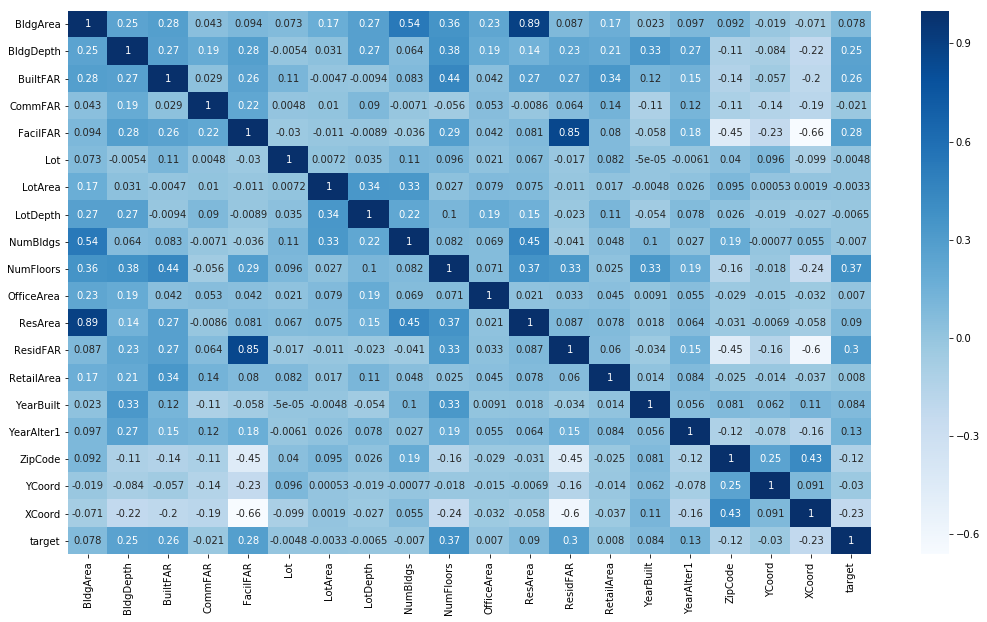

In [85]:
# using Pearson correlation
plt.figure(figsize=(18,10))
df_data_BX_1_cor = df_data_BX_1.corr()
df_data_BX_1_cor
sns.heatmap(df_data_BX_1_cor, annot = True, cmap=plt.cm.Blues)
plt.show()

In [86]:
#df_data_BX_1_cor.head()
#Correlation with output variable
bx_cor_target = abs(df_data_BX_1_cor["target"])
#Selecting highly correlated features. Here I set the threshold to be 0.12
bx_relevant_features = bx_cor_target[bx_cor_target>0.12]
bx_relevant_features

BldgDepth     0.254253
BuiltFAR      0.263040
FacilFAR      0.280027
NumFloors     0.370772
ResidFAR      0.299025
YearAlter1    0.126592
ZipCode       0.123162
XCoord        0.225738
target        1.000000
Name: target, dtype: float64

In [87]:
print(df_data_BX_1[["NumFloors","ResidFAR"]].corr())

           NumFloors  ResidFAR
NumFloors   1.000000  0.332354
ResidFAR    0.332354  1.000000


In [89]:
important_feature = ['BldgDepth', 'NumFloors', 'ResidFAR', 'ZipCode','target']
df_bx_selected_feature = df_data_BX_1[important_feature]
df_bx_selected_feature.head()

,BldgDepth,NumFloors,ResidFAR,ZipCode,target
0,0.0,0.0,6.02,10454.0,0
1,16.0,1.0,6.02,10454.0,0
2,200.0,2.0,6.02,10454.0,0
3,85.0,5.0,6.02,10454.0,1
4,70.0,5.0,6.02,10454.0,1
